In [1]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets

from pylab import rcParams

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

rcParams['figure.figsize'] = 5, 10

%matplotlib inline

In [2]:
donations = pd.read_csv('../data/raw/donations.csv')

In [3]:
donations.head()

,id,created_at,amount
0,00000ce845c00cbf0686c992fc369df4,2013-12-17 21:47:14,50.00
1,00002783bc5d108510f3f9666c8b1edd,2016-02-02 18:34:27,99.00
2,00002d44003ed46b066607c5455a999a,2016-10-25 20:15:11,10.00
3,00002d44003ed46b066607c5455a999a,2017-01-16 01:11:20,15.51
4,00002d44003ed46b066607c5455a999a,2017-01-16 14:20:10,100.00


In [4]:
min(donations.amount), max(donations.amount)

(0.01, 60000.0)

In [5]:
donations['created_at'] = pd.to_datetime(donations.created_at, format='%Y-%m-%d %H:%M:%S')

In [6]:
donations

,id,created_at,amount
0,00000ce845c00cbf0686c992fc369df4,2013-12-17 21:47:14,50.00
1,00002783bc5d108510f3f9666c8b1edd,2016-02-02 18:34:27,99.00
2,00002d44003ed46b066607c5455a999a,2016-10-25 20:15:11,10.00
3,00002d44003ed46b066607c5455a999a,2017-01-16 01:11:20,15.51
4,00002d44003ed46b066607c5455a999a,2017-01-16 14:20:10,100.00
...,...,...,...
4687879,ffffb91addfb35f11b30c2943f349654,2017-12-30 21:17:47,10.00
4687880,ffffc2e1225ac40a3ace9b8562115c9b,2016-08-29 19:09:07,75.00
4687881,ffffd8f0fbfa10b99efe90a5ee13c5df,2017-05-22 12:24:36,50.00
4687882,ffffdb40226605870f62422b2b420aab,2017-03-29 12:34:49,100.00


In [7]:
max(donations.created_at[donations.created_at.dt.year == 2018].dt.month)

5

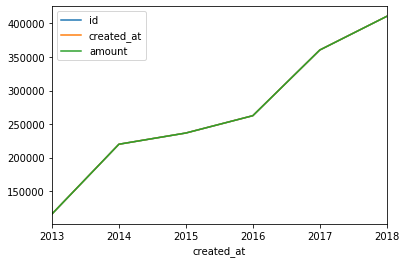

In [8]:
# How were donations behaving < 6 months per year
lt_5 = donations[donations.created_at.dt.month < 5]

lt_5.groupby(
    lt_5.created_at.dt.year
).count().plot()

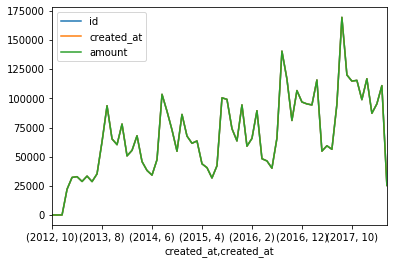

In [9]:
# How were donations behaving < 6 months per year
donations.groupby([
    donations.created_at.dt.year,
    donations.created_at.dt.month
]).count().plot()

In [10]:
monthly_counts = donations[['created_at']].groupby([
    donations.created_at.dt.year,
    donations.created_at.dt.month
]).count() \
    .rename_axis(['year', 'month']) \
    .rename(columns={'created_at': 'counts'}) \
    .reset_index() 

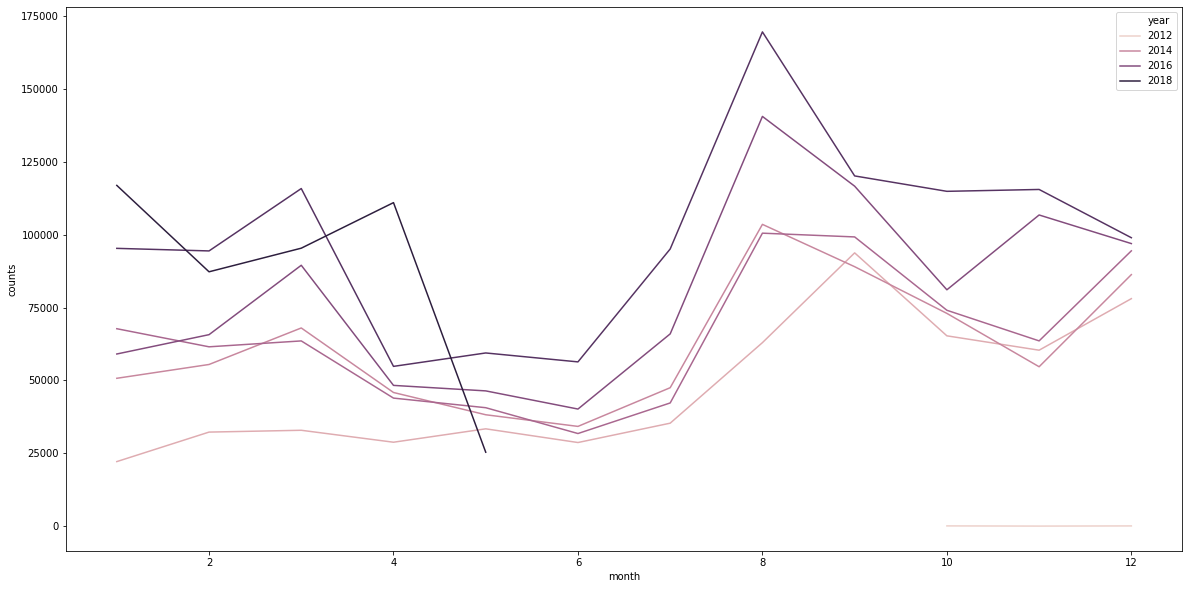

In [11]:
plt.figure(figsize=(20, 10))

ax = sns.lineplot(
    x="month", 
    y="counts", 
    hue="year",
    data=monthly_counts
)

In [12]:
top_5_bottom_5 = pd.DataFrame(columns=['year', 'month', 'rank', 'id', 'amount', 'category'])

In [13]:
for (year, month), df in donations.groupby([
    donations.created_at.dt.year,
    donations.created_at.dt.month
]):
    
    sum_per_id = df[['id', 'amount']] \
        .groupby('id') \
        .sum() \
        .sort_values('amount', ascending=False) \
        .reset_index()
    
    sum_per_id.loc[:, 'year'] = year
    sum_per_id.loc[:, 'month'] = month
    
    top_5 = sum_per_id.head(5)
    top_5.loc[:, 'rank'] = top_5.index + 1
    top_5.loc[:, 'category'] = 'top'
    
    # this should now be reversed.
    bottom_5 = sum_per_id.tail(5) \
        .sort_values('amount') \
        .reset_index()
    
    bottom_5.loc[:, 'rank'] = bottom_5.index + 1
    bottom_5.loc[:, 'category'] = 'bottom'
    
    top_5_bottom_5 = pd.concat([top_5_bottom_5, top_5, bottom_5])

/Users/ntistp30/.virtualenvs/kindful_donations-s6_uukWd/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ntistp30/.virtualenvs/kindful_donations-s6_uukWd/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/ntistp30/.virtualenvs/kindful_donations-s6_uukWd/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting bec

In [14]:
top_5_bottom_5

,amount,category,id,index,month,rank,year
0,554.0,top,4da7df0f928ef65486694170601d5aca,NaN,10,1,2012
1,520.0,top,8e7e264e844a1789abe3a92f470c9e30,NaN,10,2,2012
2,200.0,top,9bdab8cc70873e0779d6e54f0a0fd46d,NaN,10,3,2012
3,100.0,top,c52fa15e0b3d1fe3b14145ea65e54894,NaN,10,4,2012
4,100.0,top,f5d53a372c2bb5553a682d7c5f63995e,NaN,10,5,2012
...,...,...,...,...,...,...,...
0,1.0,bottom,08a2a99b938a9c4dabb74a1fca71c842,18429.0,5,1,2018
1,1.0,bottom,6254c1a7cb2c811164dbe2fd160e6ab8,18430.0,5,2,2018
2,1.0,bottom,e44530e13bdd498c2fdd07c4db77427d,18431.0,5,3,2018
3,1.0,bottom,bd5828d24703c93fd4690e323069d863,18432.0,5,4,2018


In [15]:
top_5_bottom_5.drop(columns=['index']).to_csv('../data/processed/top_5_bottom_5.csv', index=False)

In [17]:
year_month_amount = donations['created_at'].groupby([
    donations.created_at.dt.year,
    donations.created_at.dt.month
]).count() \
    .rename_axis(['year', 'month']) \
    .reset_index() \
    .drop(columns=['created_at'])

In [18]:
year_month_amount

,year,month
0,2012,10
1,2012,11
2,2012,12
3,2013,1
4,2013,2
...,...,...
63,2018,1
64,2018,2
65,2018,3
66,2018,4


In [21]:
top_or_bottom_5_donor_history_df_output = pd.DataFrame(columns=['year', 'month', 'id', 'amount'])

In [19]:
top_or_bottom_5_donor_history_df = donations[donations.id.isin(top_5_bottom_5.id)]
top_or_bottom_5_donor_history_df.head()

,id,created_at,amount
19942,01140820e597e7574a98f4842ca29266,2014-10-15 20:30:54,1.00
25834,015e196c01989e0c4f9429608b36d8fe,2013-12-11 14:08:33,100.00
25835,015e196c01989e0c4f9429608b36d8fe,2014-03-26 06:15:03,100.00
25836,015e196c01989e0c4f9429608b36d8fe,2014-04-07 12:50:51,10.00
25837,015e196c01989e0c4f9429608b36d8fe,2014-08-03 10:30:35,215.76


In [22]:
for donor_id, df in top_or_bottom_5_donor_history_df.groupby('id'):
    sum_per_month = df[['amount', 'created_at']].groupby([
        df.created_at.dt.year,
        df.created_at.dt.month
    ]).sum() \
        .rename_axis(['year', 'month']) \
        .reset_index()
    
    amount_for_all_months = pd.merge(
        year_month_amount, 
        sum_per_month, 
        on=['year', 'month'], 
        how='left'
    )
    
    amount_for_all_months['id'] = donor_id
    
    top_or_bottom_5_donor_history_df_output = pd.concat([top_or_bottom_5_donor_history_df_output, amount_for_all_months])

/Users/ntistp30/.virtualenvs/kindful_donations-s6_uukWd/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [23]:
top_or_bottom_5_donor_history_df_output[top_or_bottom_5_donor_history_df_output.amount.isna()]

,amount,id,month,year
0,NaN,01140820e597e7574a98f4842ca29266,10,2012
1,NaN,01140820e597e7574a98f4842ca29266,11,2012
2,NaN,01140820e597e7574a98f4842ca29266,12,2012
3,NaN,01140820e597e7574a98f4842ca29266,1,2013
4,NaN,01140820e597e7574a98f4842ca29266,2,2013
...,...,...,...,...
63,NaN,fffa09e6502f88d730211615667f528a,1,2018
64,NaN,fffa09e6502f88d730211615667f528a,2,2018
65,NaN,fffa09e6502f88d730211615667f528a,3,2018
66,NaN,fffa09e6502f88d730211615667f528a,4,2018


In [30]:
top_or_bottom_5_donor_history_df_output.loc[top_or_bottom_5_donor_history_df_output.amount.isna(), 'amount'] = 0

In [24]:
top_or_bottom_5_donor_history_df_output.to_csv(
    '../data/processed/top_or_bottom_5_donor_history_df_output.csv', 
    index=False
)

In [25]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta


def last_year_range(date):
    upper_bound = datetime(date.year, date.month, 1)
    lower_bound = upper_bound - relativedelta(years=1, months=1)
    return lower_bound, upper_bound - relativedelta(days=1)

In [26]:
last_year_range(datetime(2017, 3, 4))

(datetime.datetime(2016, 2, 1, 0, 0), datetime.datetime(2017, 2, 28, 0, 0))

In [27]:
last_year_range(datetime(2016, 2, 1, 0, 0))
    

(datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2016, 1, 31, 0, 0))

In [28]:
top_or_bottom_5_donor_history_df_output['date'] = top_or_bottom_5_donor_history_df_output.apply(
    lambda x: datetime(x.year, x.month, day=1),
    axis = 1
)

In [31]:
top_or_bottom_5_donor_history_df_output

,amount,id,month,year,date
0,0.0,01140820e597e7574a98f4842ca29266,10,2012,2012-10-01
1,0.0,01140820e597e7574a98f4842ca29266,11,2012,2012-11-01
2,0.0,01140820e597e7574a98f4842ca29266,12,2012,2012-12-01
3,0.0,01140820e597e7574a98f4842ca29266,1,2013,2013-01-01
4,0.0,01140820e597e7574a98f4842ca29266,2,2013,2013-02-01
...,...,...,...,...,...
63,0.0,fffa09e6502f88d730211615667f528a,1,2018,2018-01-01
64,0.0,fffa09e6502f88d730211615667f528a,2,2018,2018-02-01
65,0.0,fffa09e6502f88d730211615667f528a,3,2018,2018-03-01
66,0.0,fffa09e6502f88d730211615667f528a,4,2018,2018-04-01


In [32]:
def rolling_windows(series):
    
    date, donor_id = series.date, series.id
    
    last_year_lower_bound, last_year_upper_bound = last_year_range(date)
    prev_year_lower_bound, prev_year_upper_bound = last_year_range(last_year_lower_bound)
    
    last_year_sum = top_or_bottom_5_donor_history_df_output[
        (top_or_bottom_5_donor_history_df_output.id == donor_id) &
        (top_or_bottom_5_donor_history_df_output.date >= last_year_lower_bound) &
        (top_or_bottom_5_donor_history_df_output.date <= last_year_upper_bound)
    ].amount.sum()
    
    prev_year_sum = top_or_bottom_5_donor_history_df_output[
        (top_or_bottom_5_donor_history_df_output.id == donor_id) &
        (top_or_bottom_5_donor_history_df_output.date >= prev_year_lower_bound) &
        (top_or_bottom_5_donor_history_df_output.date <= prev_year_upper_bound)
    ].amount.sum()
    
    return pd.Series([last_year_sum, prev_year_sum, prev_year_lower_bound, prev_year_upper_bound, last_year_lower_bound, last_year_upper_bound])


In [34]:
top_5_bottom_5['date'] = top_5_bottom_5.apply(lambda x: datetime(x.year, x.month, 1), axis=1)

In [35]:
top_5_bottom_5[[
    'last_year_rolling', 
    'prev_year_rolling', 
    'prev_year_lower_bound', 
    'prev_year_upper_bound', 
    'last_year_upper_bound', 
    'last_year_lower_bound'
]] = top_5_bottom_5[['date', 'id']].apply(rolling_windows, axis=1)

In [36]:
top_5_bottom_5[top_5_bottom_5.category == 'top'].tail(30)

,amount,category,id,index,month,rank,year,date,last_year_rolling,prev_year_rolling,prev_year_lower_bound,prev_year_upper_bound,last_year_upper_bound,last_year_lower_bound
0,103212.25,top,3ba8a29e3dd72043f9738c0895733834,NaN,12,1,2017,2017-12-01,531498.17,0.00,2015-10-01,2016-10-31,2016-11-01,2017-11-30
1,84079.39,top,f9dd79ea006fee7bb4a5cc8473d8656c,NaN,12,2,2017,2017-12-01,578435.44,132568.23,2015-10-01,2016-10-31,2016-11-01,2017-11-30
2,50970.14,top,d006be7223c048ae8b2bdedd7dd2b4db,NaN,12,3,2017,2017-12-01,309363.20,229308.99,2015-10-01,2016-10-31,2016-11-01,2017-11-30
3,39180.41,top,2e8bd28fdf837793c7918038b89e1da4,NaN,12,4,2017,2017-12-01,37718.58,0.00,2015-10-01,2016-10-31,2016-11-01,2017-11-30
4,35075.93,top,5f521d214a6297fe87b60f921bba51ab,NaN,12,5,2017,2017-12-01,91496.37,91520.63,2015-10-01,2016-10-31,2016-11-01,2017-11-30
0,92332.70,top,3ba8a29e3dd72043f9738c0895733834,NaN,1,1,2018,2018-01-01,634710.42,0.00,2015-11-01,2016-11-30,2016-12-01,2017-12-31
1,62122.37,top,96c4f21513cd8962acb147ab384e6434,NaN,1,2,2018,2018-01-01,263835.45,244123.99,2015-11-01,2016-11-30,2016-12-01,2017-12-31
2,47892.29,top,4f574681fb8805c553bcde9578e9661c,NaN,1,3,2018,2018-01-01,10460.86,0.00,2015-11-01,2016-11-30,2016-12-01,2017-12-31
3,37271.99,top,2144d56b1947ebb26a19e7f1d07c970a,NaN,1,4,2018,2018-01-01,279416.48,337500.36,2015-11-01,2016-11-30,2016-12-01,2017-12-31
4,34055.97,top,d006be7223c048ae8b2bdedd7dd2b4db,NaN,1,5,2018,2018-01-01,330416.07,252696.81,2015-11-01,2016-11-30,2016-12-01,2017-12-31


In [37]:
top_5_bottom_5['rolling_diff'] = top_5_bottom_5.last_year_rolling - top_5_bottom_5.prev_year_rolling

In [38]:
top_5_bottom_5.drop(columns=['index']).to_csv('../data/processed/top_5_bottom_5_with_rolling.csv', index=False)